     ICICIBANK
0     HDFCBANK
1          TCS
2    KOTAKBANK
3          ITC
4           LT
5   HINDUNILVR
6         SBIN
7   BAJFINANCE
8   BHARTIARTL
9   ASIANPAINT
10   TATASTEEL
11   SUNPHARMA
12  TATAMOTORS
13    JSWSTEEL
14     HCLTECH
15      MARUTI
16  BAJAJFINSV
17         M&M
18    AXISBANK
19       TITAN
20  ULTRACEMCO
21       TECHM
22   POWERGRID
23  ADANIPORTS
24       WIPRO
25    HINDALCO
26        NTPC
27   NESTLEIND
28        ONGC
29      GRASIM
30  INDUSINDBK
31    DIVISLAB
32  TATACONSUM
33       CIPLA
34    HDFCLIFE
35   COALINDIA
36  BAJAJ-AUTO
37  APOLLOHOSP
38     DRREDDY
39     SBILIFE
40         UPL
41   EICHERMOT
42        BPCL
43    SHREECEM
44  HEROMOTOCO
45    HDFCBANK
46        INFY
47    RELIANCE
48   BRITANNIA


[*********************100%***********************]  48 of 48 completed


Price                                       adj close         close  \
date                      ticker                                      
2016-09-29 00:00:00+00:00 ADANIPORTS.NS    245.573257    256.799988   
                          APOLLOHOSP.NS   1298.788574   1336.000000   
                          ASIANPAINT.NS   1097.470581   1167.349976   
                          AXISBANK.NS      531.076538    539.299988   
                          BAJAJ-AUTO.NS   2294.466797   2846.399902   
...                                               ...           ...   
2024-09-26 00:00:00+00:00 TECHM.NS        1606.949951   1606.949951   
                          TITAN.NS        3757.550049   3757.550049   
                          ULTRACEMCO.NS  12065.000000  12065.000000   
                          UPL.NS           601.099976    601.099976   
                          WIPRO.NS         541.900024    541.900024   

Price                                            high           low  \
date 

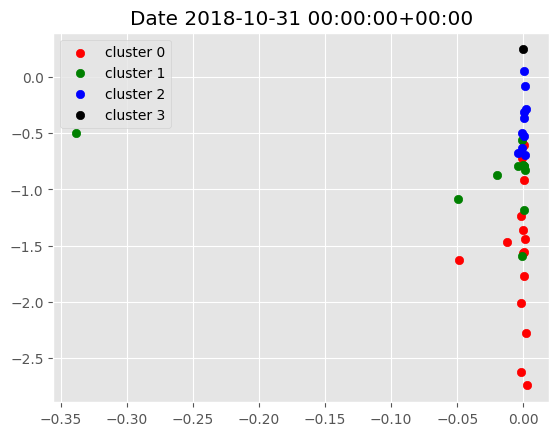

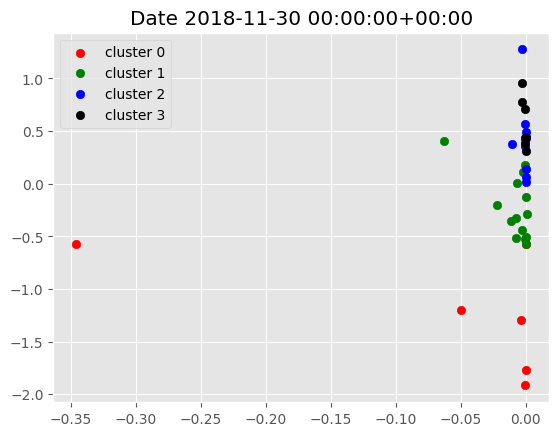

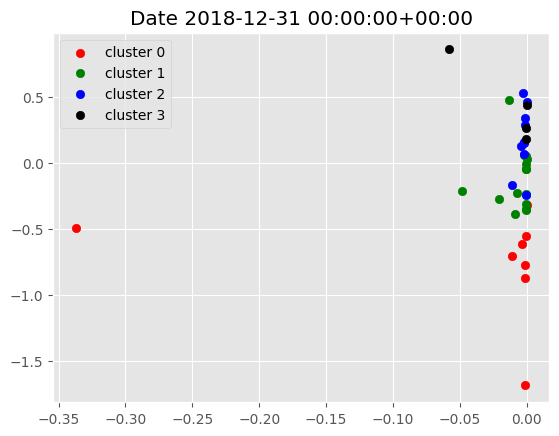

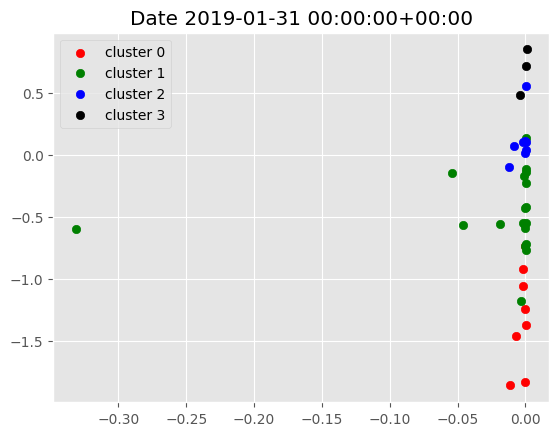

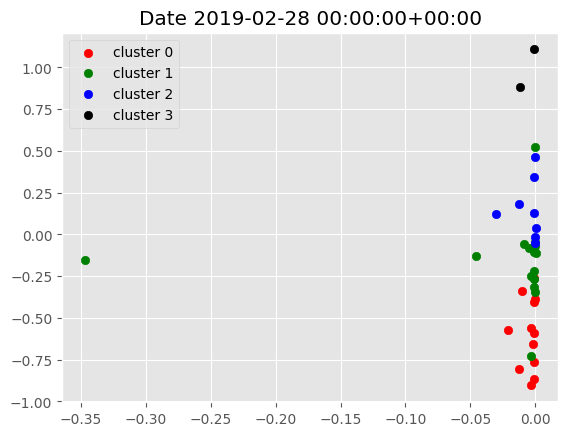

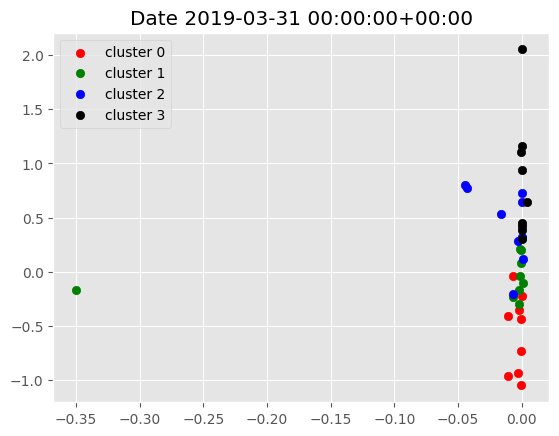

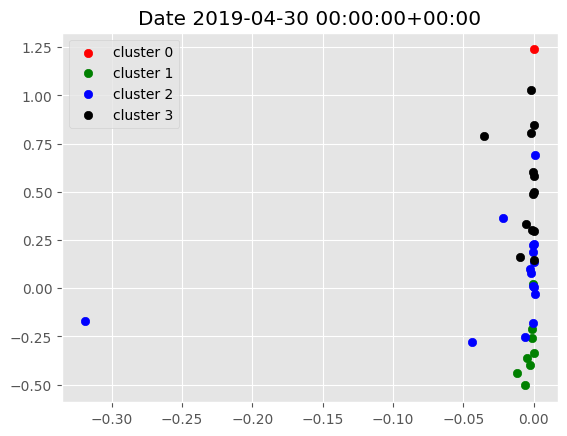

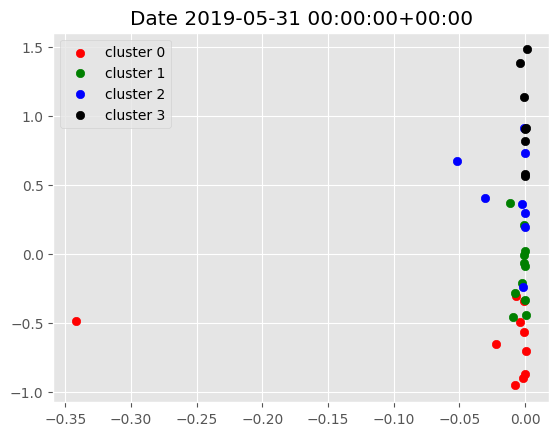

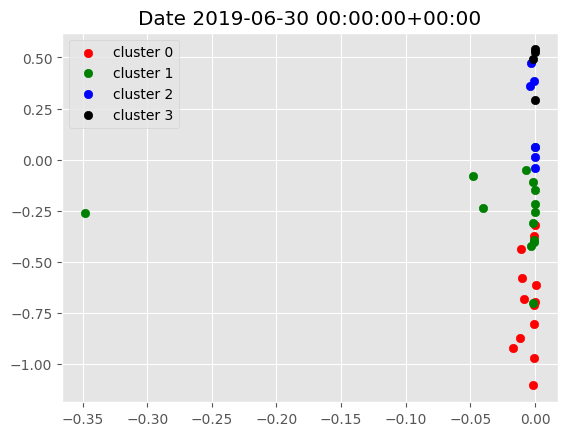

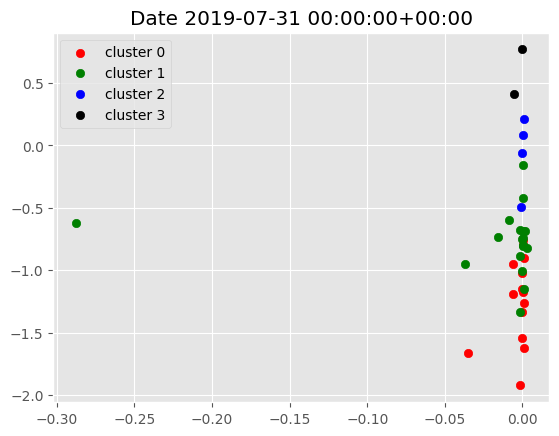

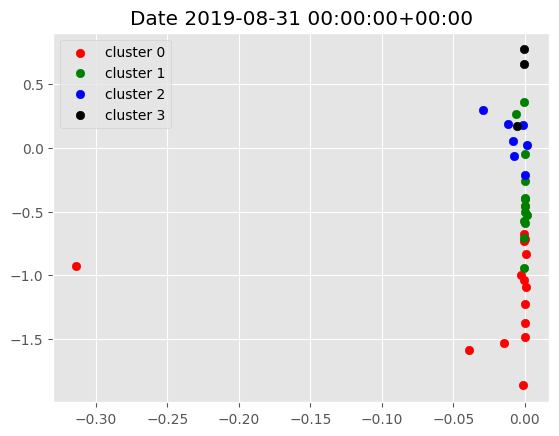

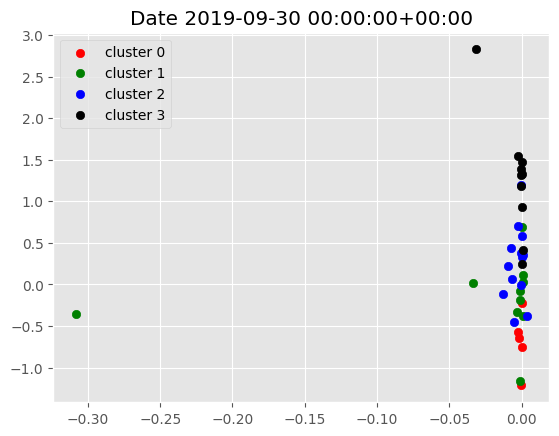

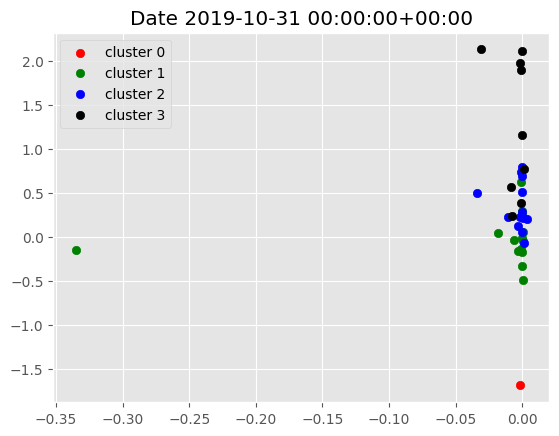

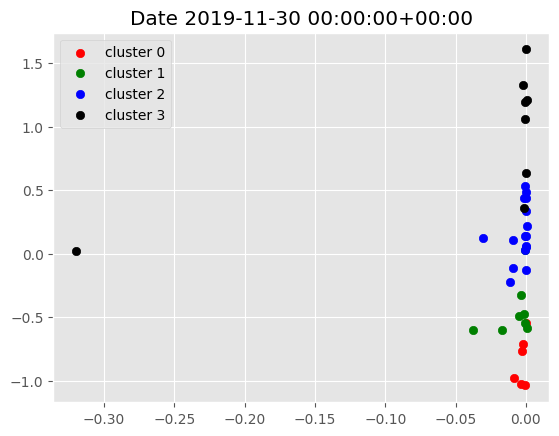

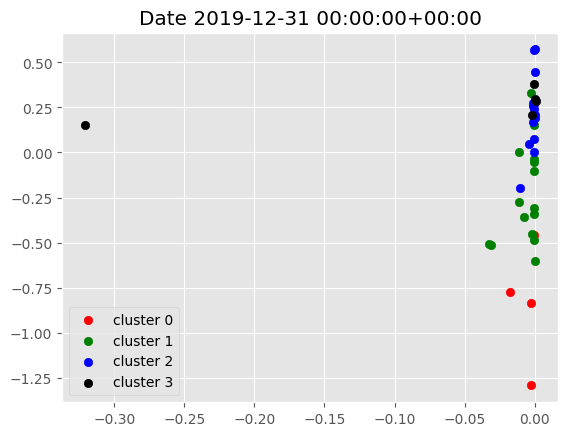

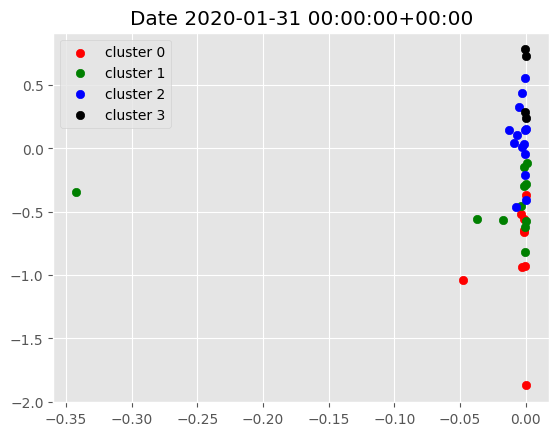

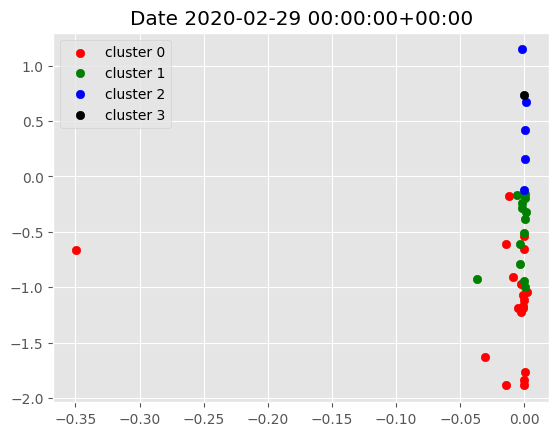

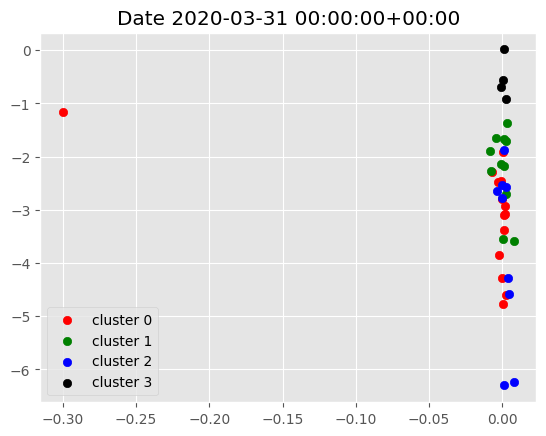

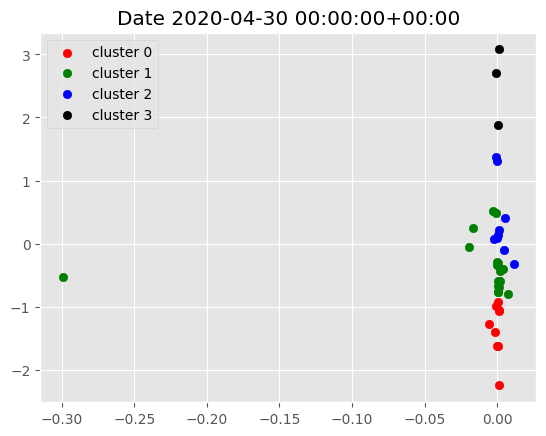

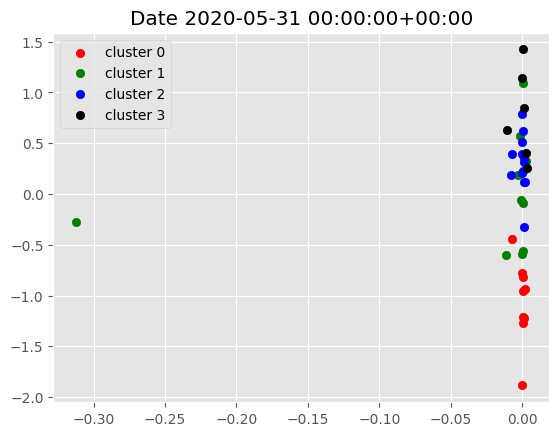

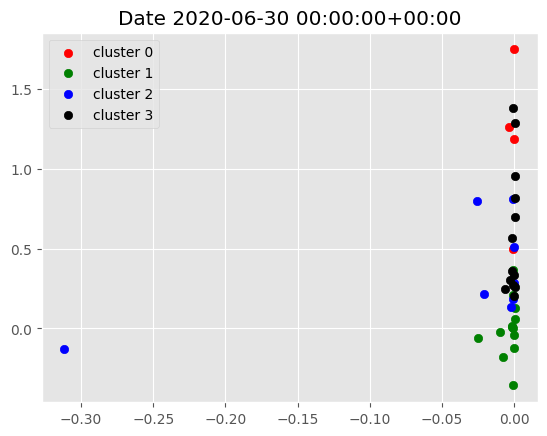

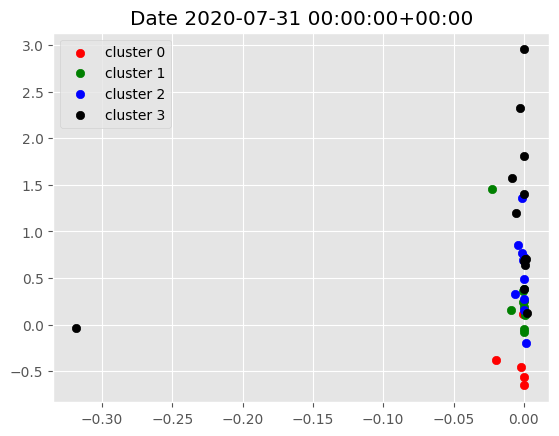

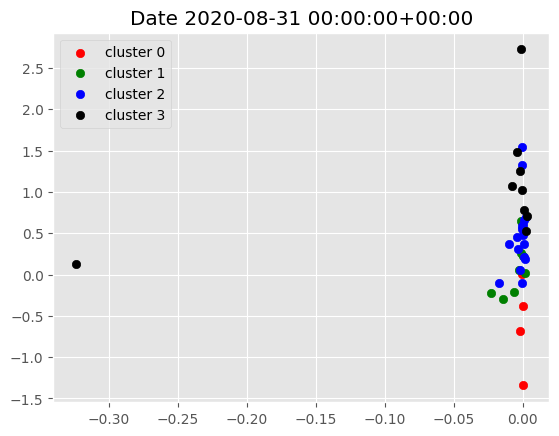

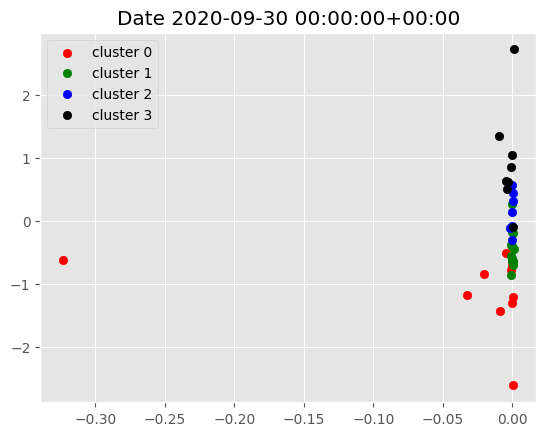

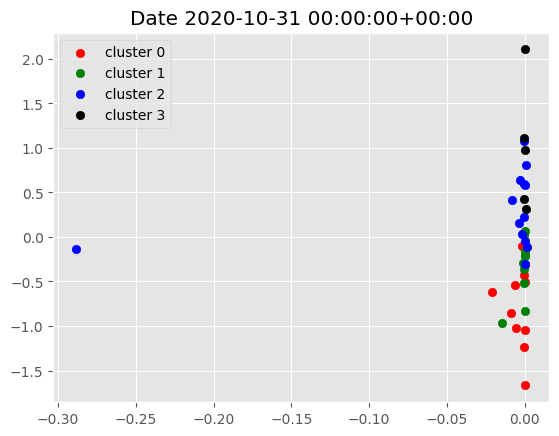

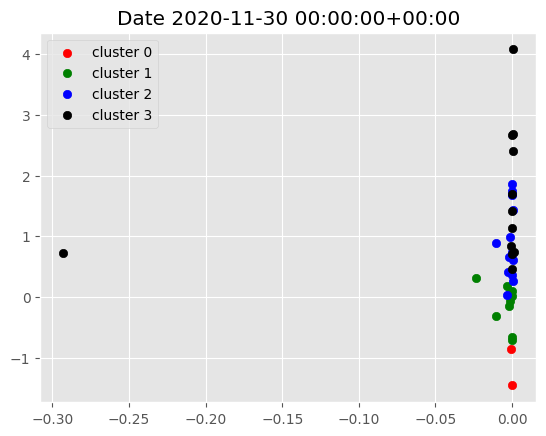

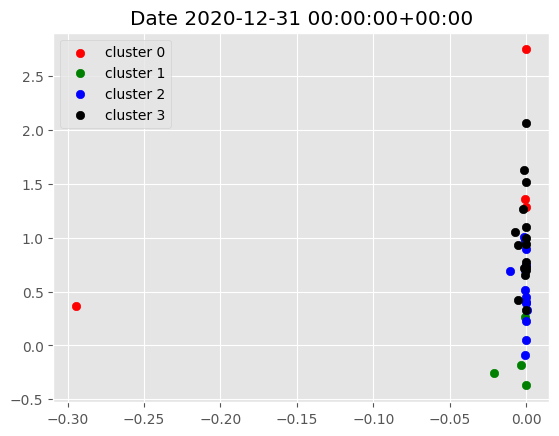

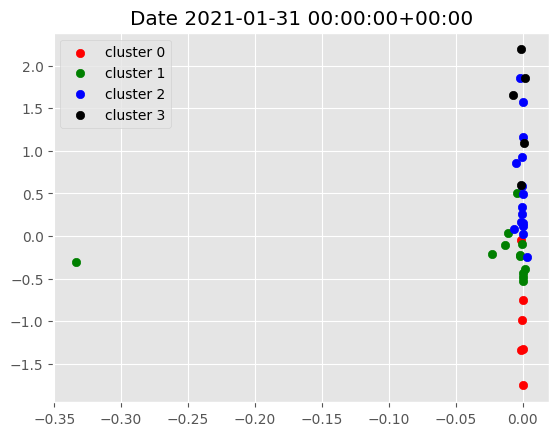

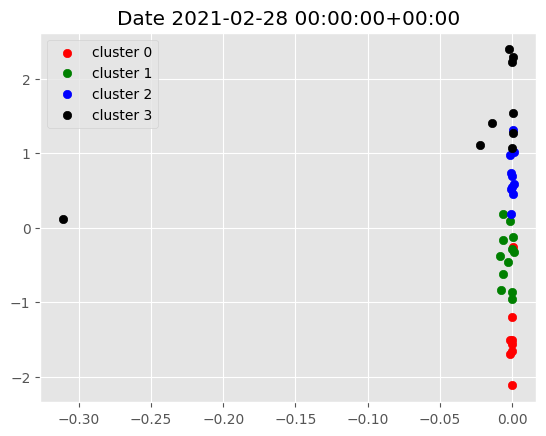

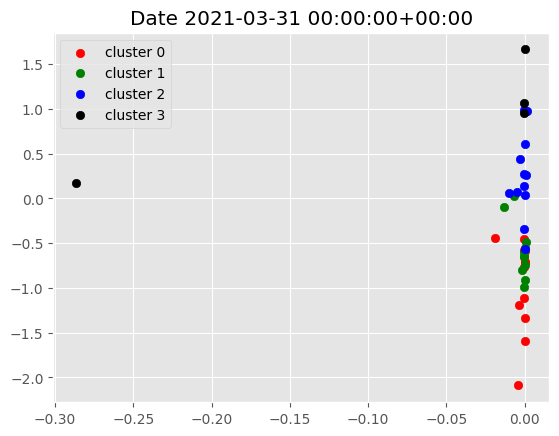

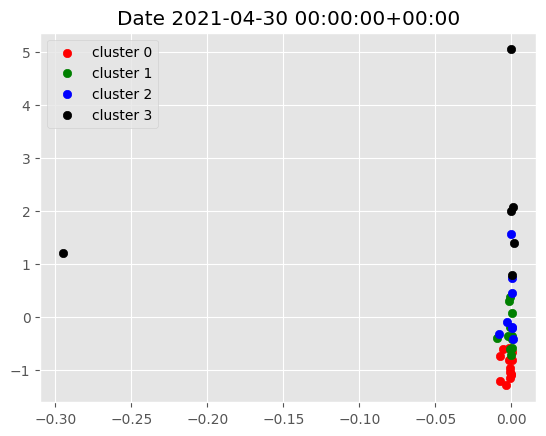

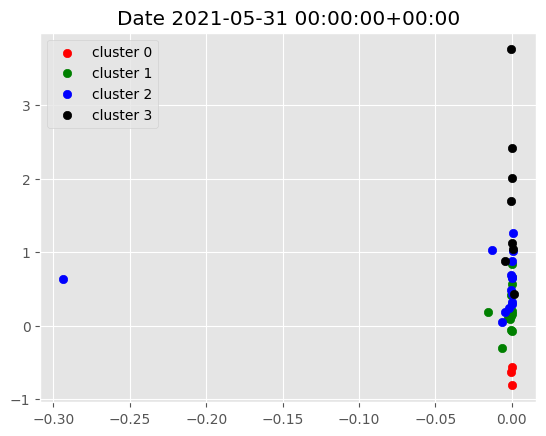

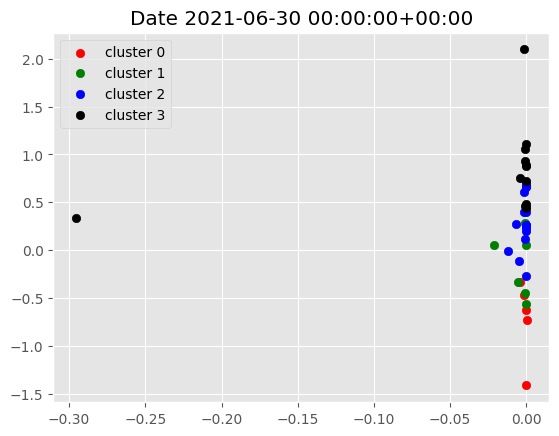

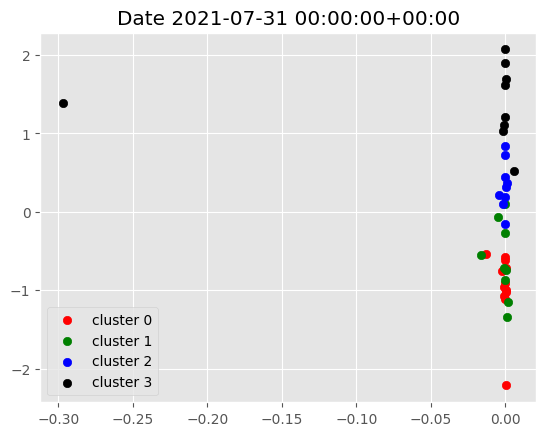

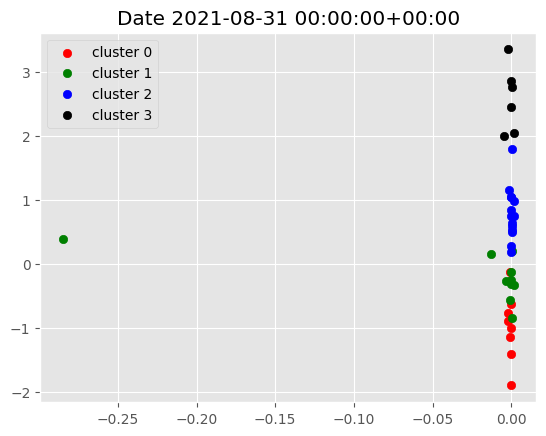

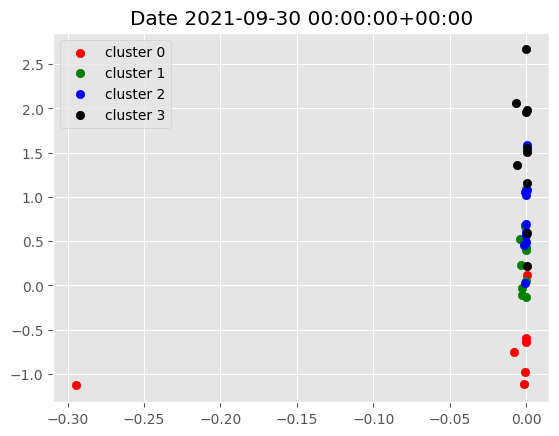

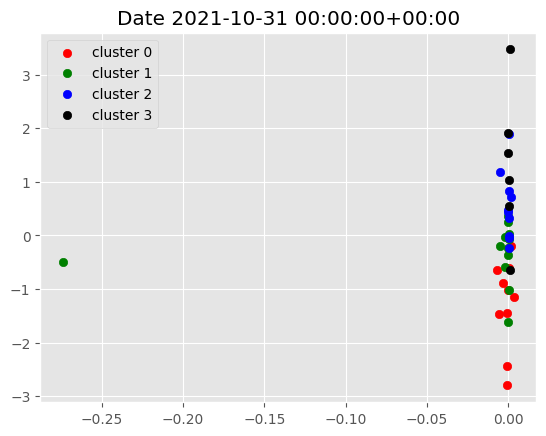

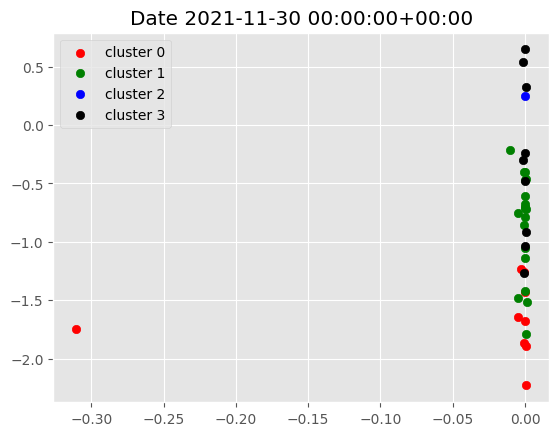

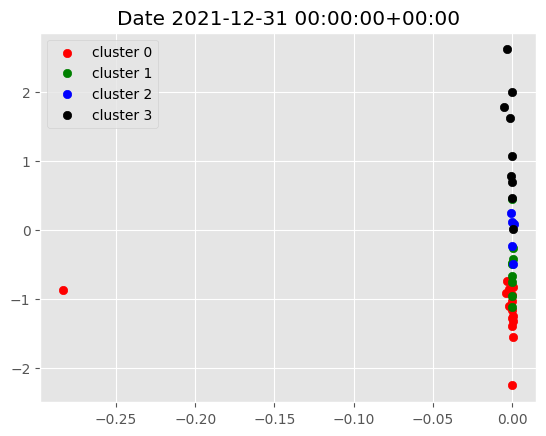

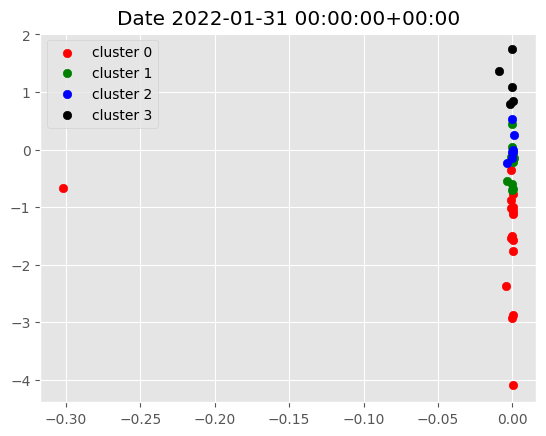

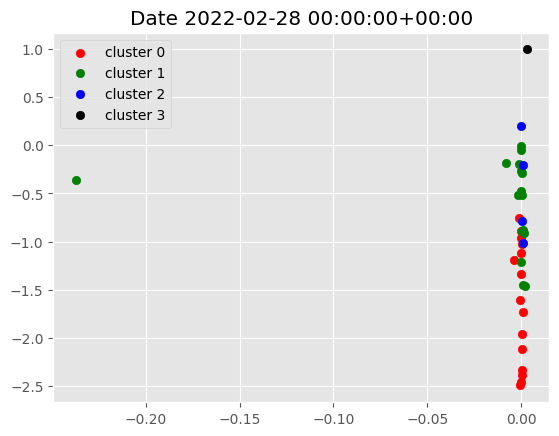

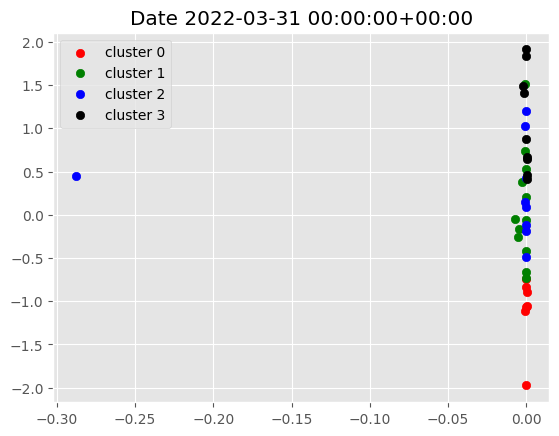

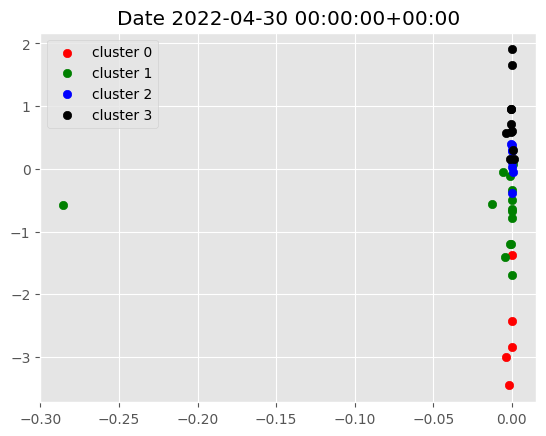

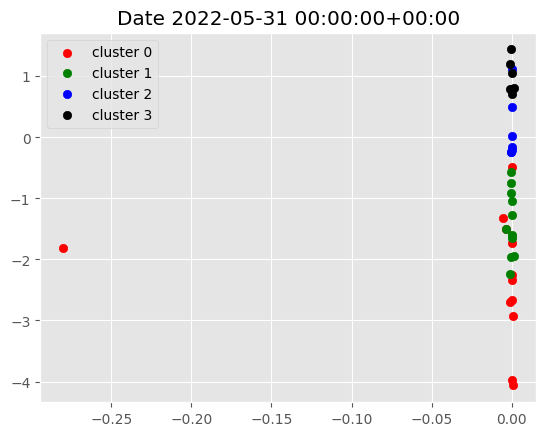

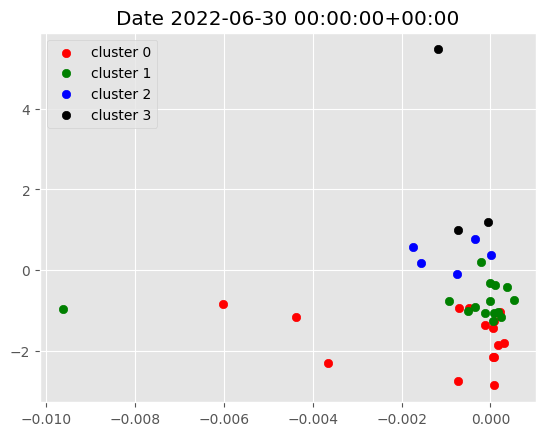

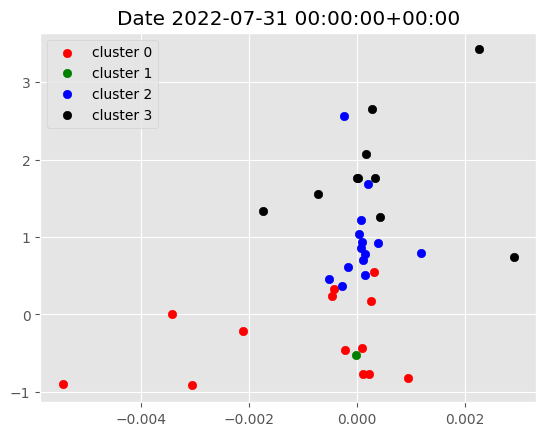

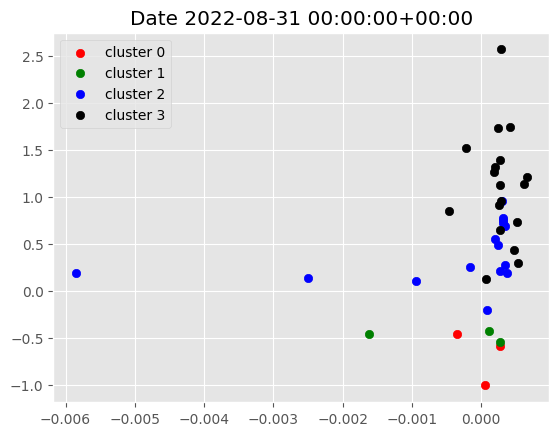

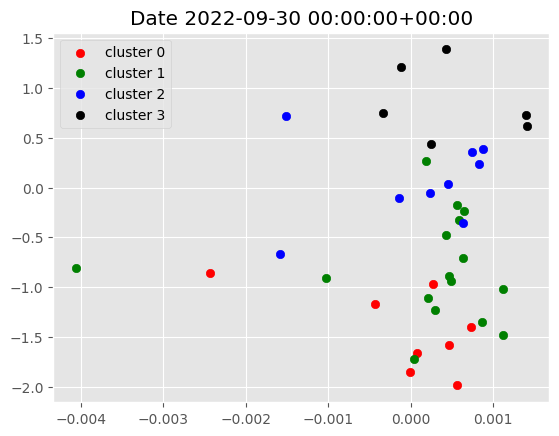

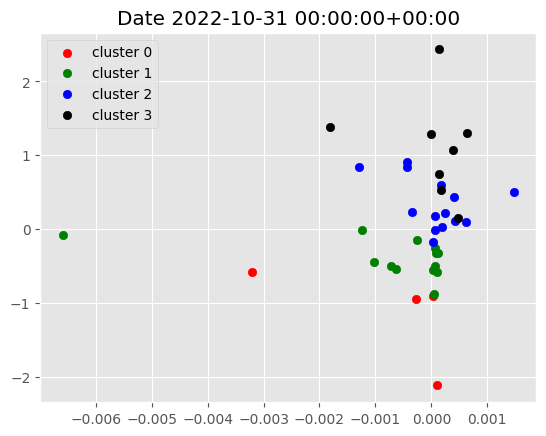

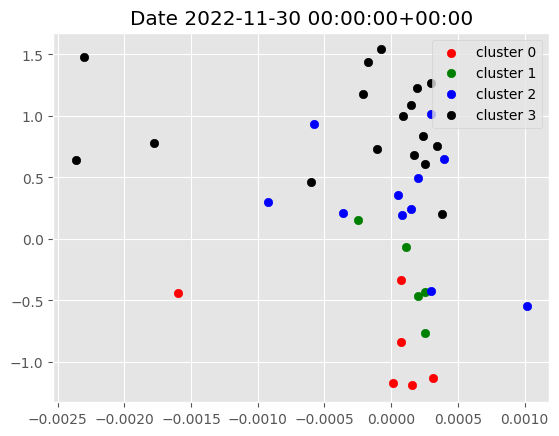

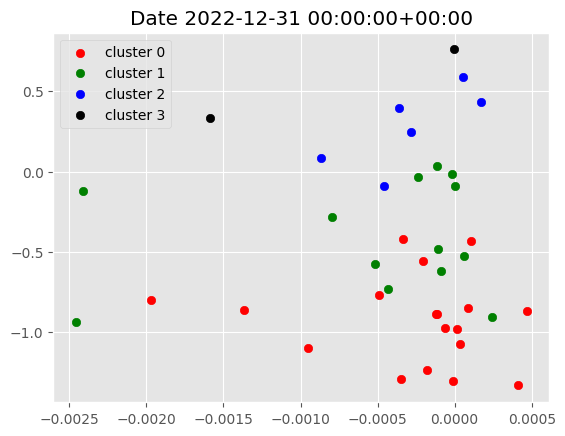

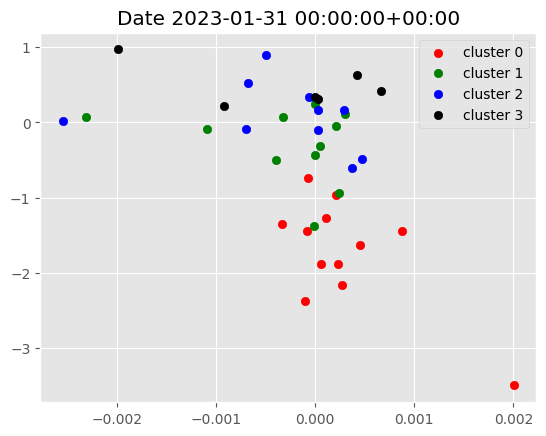

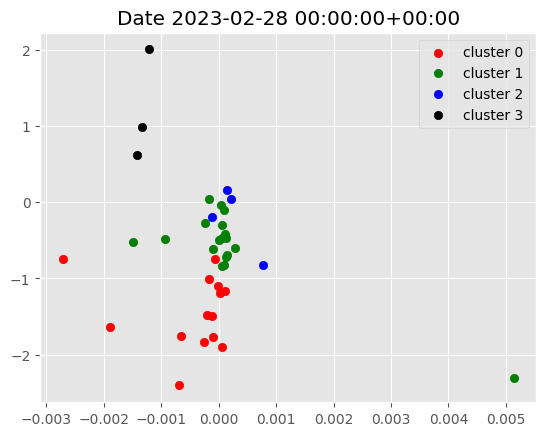

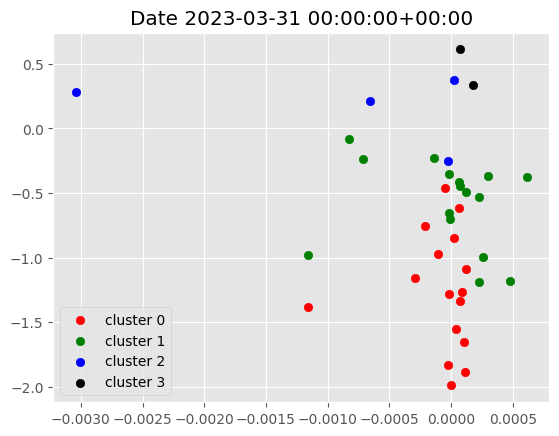

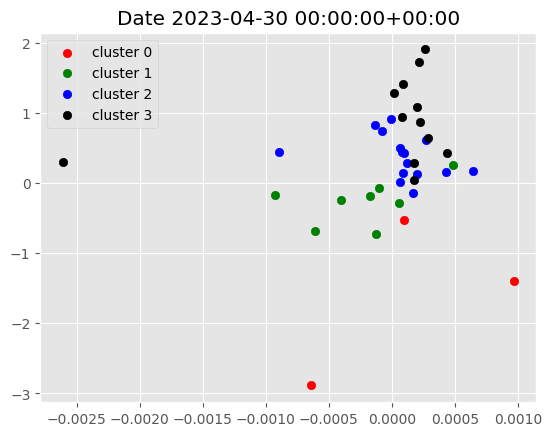

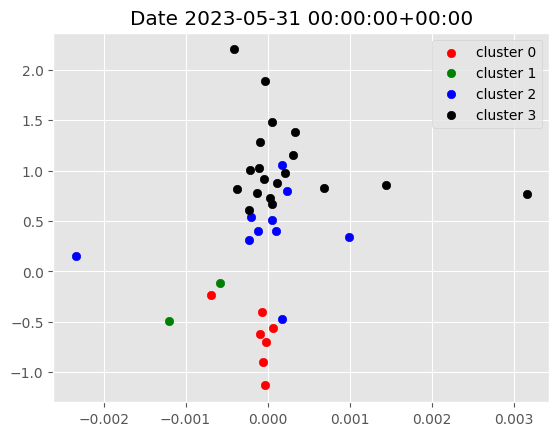

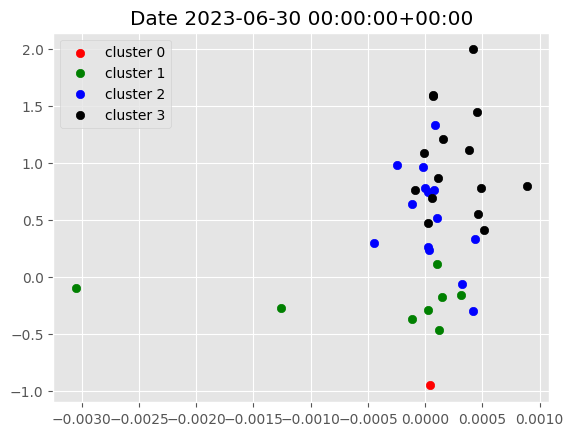

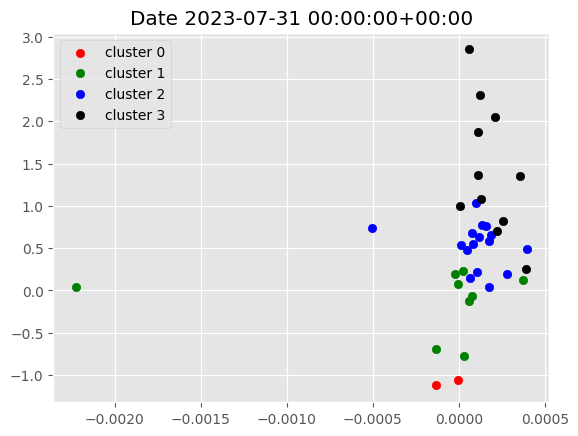

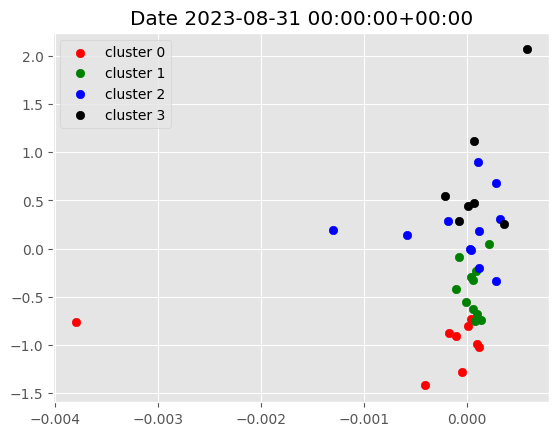

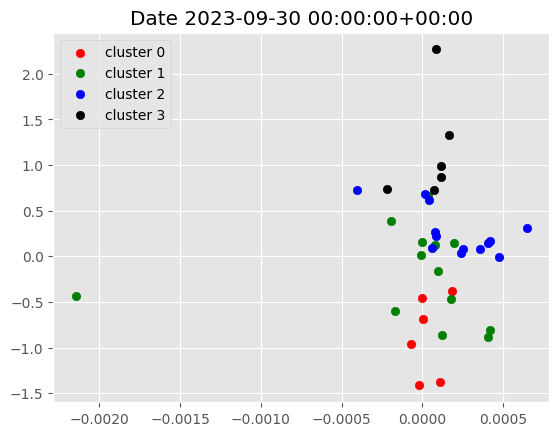

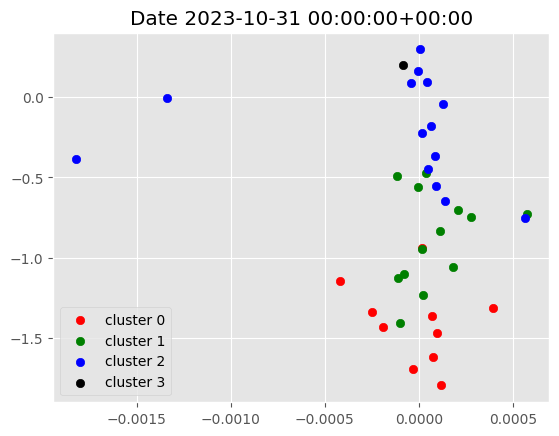

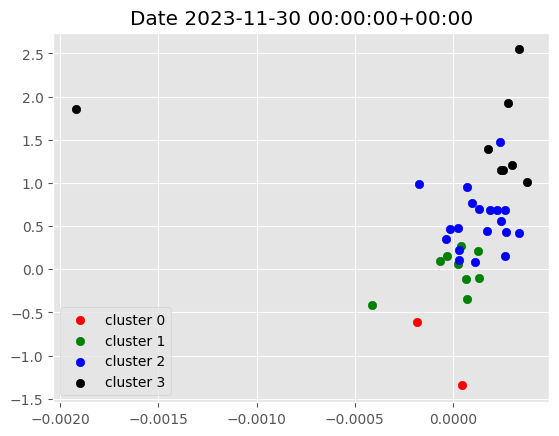

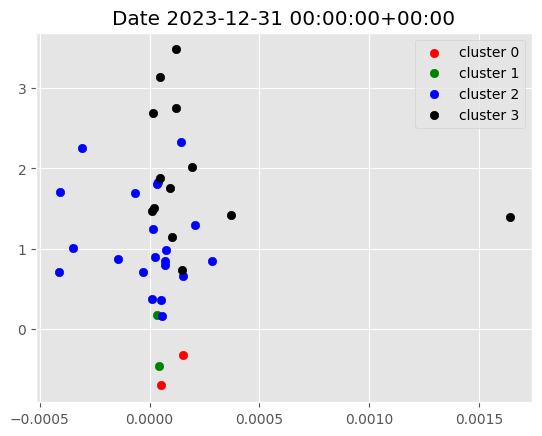

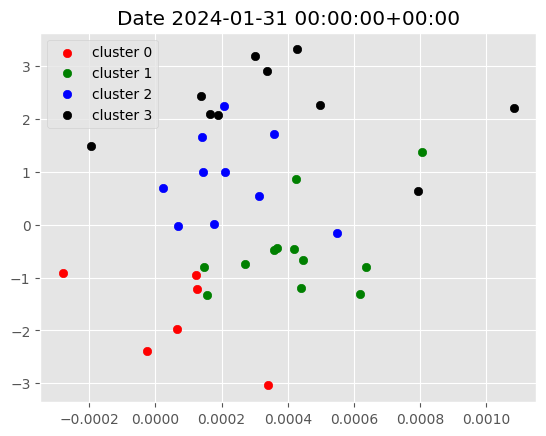

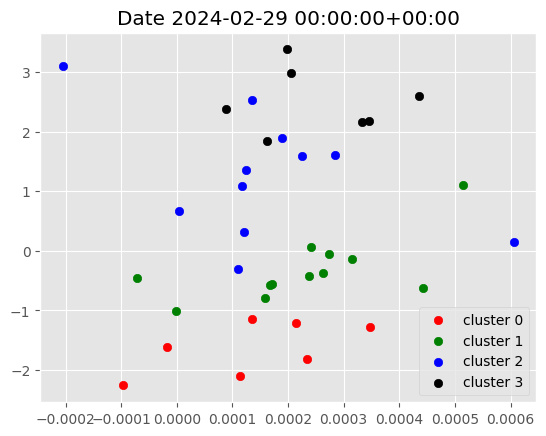

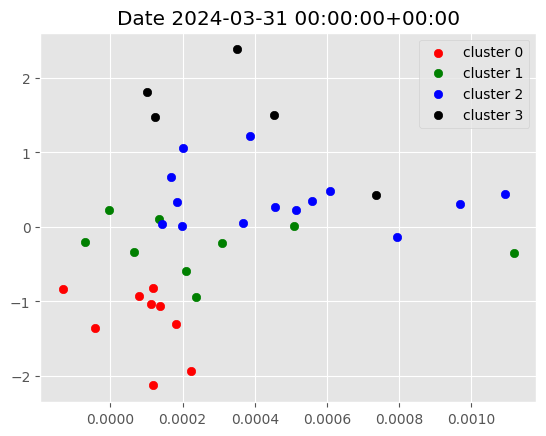

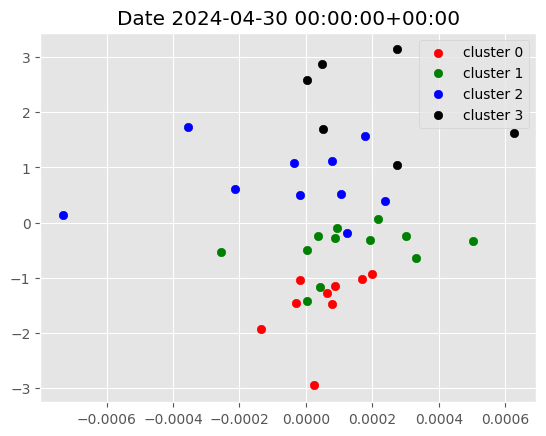

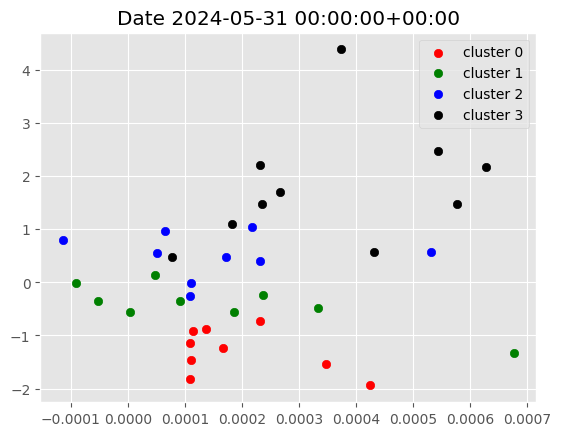

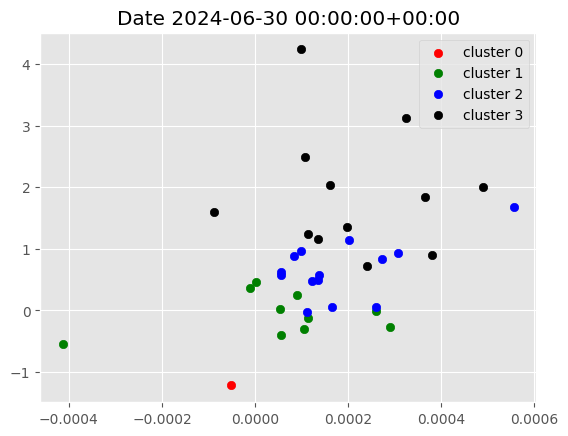

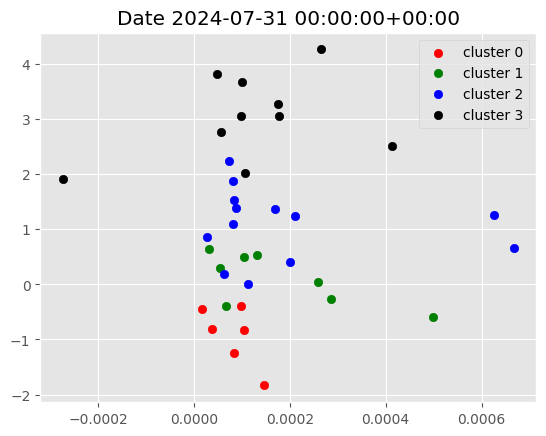

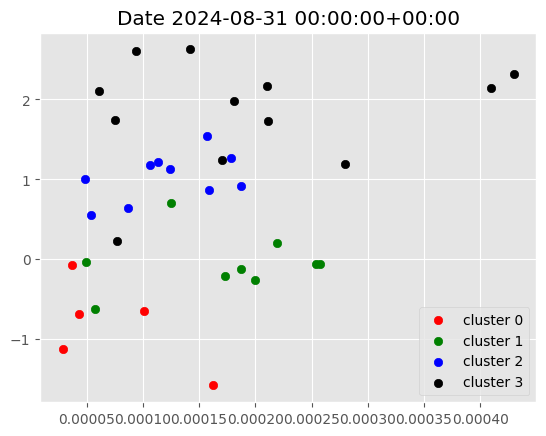

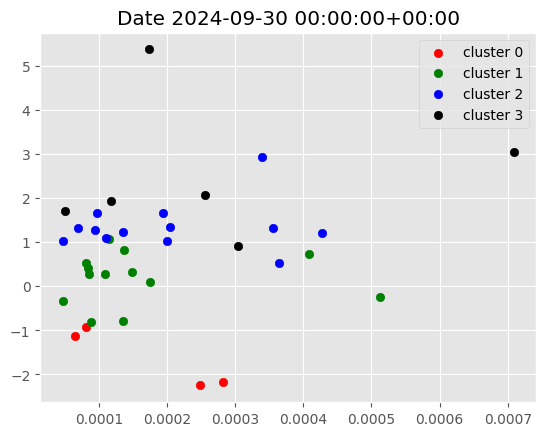

{'2018-11-01': ['DIVISLAB.NS'], '2018-12-01': ['DRREDDY.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'KOTAKBANK.NS', 'LT.NS', 'TITAN.NS'], '2019-01-01': ['ADANIPORTS.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BPCL.NS'], '2019-02-01': ['AXISBANK.NS', 'INFY.NS', 'WIPRO.NS'], '2019-03-01': ['TECHM.NS', 'UPL.NS'], '2019-04-01': ['ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'HDFCBANK.NS', 'INDUSINDBK.NS', 'SBIN.NS', 'TITAN.NS', 'UPL.NS'], '2019-05-01': ['BAJAJFINSV.NS', 'BAJFINANCE.NS', 'CIPLA.NS', 'DRREDDY.NS', 'GRASIM.NS', 'HCLTECH.NS', 'KOTAKBANK.NS', 'ONGC.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'UPL.NS', 'WIPRO.NS'], '2019-06-01': ['AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'LT.NS', 'SBIN.NS', 'TITAN.NS', 'ULTRACEMCO.NS'], '2019-07-01': ['BAJAJFINSV.NS', 'BAJFINANCE.NS', 'SBIN.NS', 'TITAN.NS'], '2019-08-01': ['ASIANPAINT.NS', 'INFY.NS'], '2019-09-01': ['ASIANPAINT.NS', 'HINDUNILVR.NS', 'INFY.NS'], '2019-10-01': ['ADANIPORTS.NS', 'ASIANPAINT.NS', 'BAJAJFIN

[*********************100%***********************]  40 of 40 completed

Price                         Adj Close                              \
Ticker                    ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS   
Date                                                                  
2017-10-31 00:00:00+00:00    412.892426   1015.169617   1120.927612   
2017-11-01 00:00:00+00:00    415.530853   1010.575317   1116.276489   
2017-11-02 00:00:00+00:00    419.512482   1009.597717   1118.602173   
2017-11-03 00:00:00+00:00    417.209839    999.676270   1112.953857   
2017-11-06 00:00:00+00:00    419.800293    989.461548   1103.366699   
...                                 ...           ...           ...   
2024-09-23 00:00:00+00:00   1456.150024   7152.799805   3277.449951   
2024-09-24 00:00:00+00:00   1456.650024   7122.000000   3248.399902   
2024-09-25 00:00:00+00:00   1452.550049   7133.450195   3244.750000   
2024-09-26 00:00:00+00:00   1472.599976   7167.850098   3277.050049   
2024-09-27 00:00:00+00:00   1456.699951   7234.000000   3310.750000   

Price

In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

sussy = pd.read_excel(r'C:\Users\ajay_\Downloads\Folder to be synced to github\Finance\your_file.xlsx', sheet_name='Sheet1', usecols='A', skiprows=2, nrows=50)
print (sussy)
tickers = sussy.iloc[:, 0].tolist()  
tickers = [ticker + ".NS" for ticker in tickers]

end_date = '2024-09-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)


df_new = yf.download(tickers=tickers,
                 start=start_date,
                 end=end_date).stack()

df_new.index.names = ['date', 'ticker']

df_new.columns = df_new.columns.str.lower()


df=df_new

df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

print (df)
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<40].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)


def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()



print (data)

# Assuming 'date' is the first level of your MultiIndex:
if isinstance(data.index, pd.MultiIndex):
    # Extract the 'date' level (assuming it's the first level)
    date_index = data.index.get_level_values('date')  # or use 0 if it's the first level
    print(date_index.tz)  # This will show None if tz-naive, or the timezone if tz-aware
else:
    print(data.index.tz)  # If it's not MultiIndex, check tz directly



factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

# # Assuming 'date' is the first level of your MultiIndex:
# if isinstance(factor_data.index, pd.MultiIndex):
#     # Extract the 'date' level (assuming it's the first level)
#     date_index = factor_data.index.get_level_values('date')  # or use 0 if it's the first level
#     print(date_index.tz)  # This will show None if tz-naive, or the timezone if tz-aware
# else:
#     print(factor_data.index.tz)  # If it's not MultiIndex, check tz directly




# Convert the date index to UTC if it's tz-naive
if isinstance(factor_data.index, pd.MultiIndex):
    # Extract the 'date' level
    date_index = factor_data.index.get_level_values('date')
else:
    date_index = factor_data.index

# Check if the index is timezone-naive
if date_index.tz is None:
    # Localize to UTC
    date_index = date_index.tz_localize('UTC')
    # If you want to replace the index in factor_data
    if isinstance(factor_data.index, pd.MultiIndex):
        factor_data.index = factor_data.index.set_levels([date_index] + list(factor_data.index.levels[1:]))
    else:
        factor_data.index = date_index

# Check the updated timezone
print(factor_data.index.tz)


factor_data = factor_data.join(data['return_1m']).sort_index()
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

print (factor_data)

betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

print (betas) 


factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

from sklearn.cluster import KMeans

# You don't need to define `initial_centroids` manually. The K-Means++ is selected with init='k-means++'

# def get_clusters(df):
#     kmeans = KMeans(
#         n_clusters=4,  # Number of clusters
#         random_state=0,  # Ensures reproducibility
#         init='k-means++'  # K-Means++ initialization
#     )
    
#     # Fit the model and assign cluster labels
#     df['cluster'] = kmeans.fit(df).labels_
    
#     return df

target_rsi_values = [-0.9, -0.3, 0.3, 0.9]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

print (initial_centroids)
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df
# Assuming `data` is already defined
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)
print(data)



# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering

# # Perform hierarchical clustering
# hc = AgglomerativeClustering(n_clusters=4)
# hc.fit(data)

# # Get cluster centers as initial centroids
# initial_centroids = data.groupby(hc.labels_).mean().values

# data = data.drop('cluster', axis=1, errors='ignore')


# def get_clusters(df):
#     df['cluster'] = KMeans(n_clusters=4,
#                            random_state=0,
#                            init=initial_centroids).fit(df).labels_
#     return df

# data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)
# print (data)


def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,0] , cluster_0.iloc[:,6] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,0] , cluster_1.iloc[:,6] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,0] , cluster_2.iloc[:,6] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,0] , cluster_3.iloc[:,6] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)



filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
print (fixed_dates)

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

print (new_df)

In [3]:
from IPython.display import display
display(new_df)


Price                         Adj Close                              \
Ticker                    ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS   
Date                                                                  
2017-10-31 00:00:00+00:00    412.892426   1015.169617   1120.927612   
2017-11-01 00:00:00+00:00    415.530853   1010.575317   1116.276489   
2017-11-02 00:00:00+00:00    419.512482   1009.597717   1118.602173   
2017-11-03 00:00:00+00:00    417.209839    999.676270   1112.953857   
2017-11-06 00:00:00+00:00    419.800293    989.461548   1103.366699   
...                                 ...           ...           ...   
2024-09-23 00:00:00+00:00   1456.150024   7152.799805   3277.449951   
2024-09-24 00:00:00+00:00   1456.650024   7122.000000   3248.399902   
2024-09-25 00:00:00+00:00   1452.550049   7133.450195   3244.750000   
2024-09-26 00:00:00+00:00   1472.599976   7167.850098   3277.050049   
2024-09-27 00:00:00+00:00   1456.699951   7234.000000   3310.750000   

Price                                                               \
Ticker                     AXISBANK.NS BAJAJ-AUTO.NS BAJAJFINSV.NS   
Date                                                                 
2017-10-31 00:00:00+00:00   520.234375   2678.692627    499.565186   
2017-11-01 00:00:00+00:00   532.117798   2664.423828    500.786621   
2017-11-02 00:00:00+00:00   529.184265   2665.534180    496.753479   
2017-11-03 00:00:00+00:00   537.089905   2646.083984    501.783691   
2017-11-06 00:00:00+00:00   531.521118   2639.833496    499.490417   
...                                ...           ...           ...   
2024-09-23 00:00:00+00:00  1246.800049  12338.950195   1919.949951   
2024-09-24 00:00:00+00:00  1239.550049  12443.650391   1904.650024   
2024-09-25 00:00:00+00:00  1268.099976  12397.250000   1928.500000   
2024-09-26 00:00:00+00:00  1277.099976  12621.650391   1982.800049   
2024-09-27 00:00:00+00:00  1273.150024  12666.400391   2010.699951   

Price                                                              \
Ticker                    BAJFINANCE.NS BHARTIARTL.NS     BPCL.NS   
Date                                                                
2017-10-31 00:00:00+00:00   1764.484985    430.766846  174.210861   
2017-11-01 00:00:00+00:00   1770.511719    467.068451  173.631897   
2017-11-02 00:00:00+00:00   1773.892456    470.620605  174.612946   
2017-11-03 00:00:00+00:00   1800.105713    468.931152  171.476761   
2017-11-06 00:00:00+00:00   1785.455688    461.393616  168.614014   
...                                 ...           ...         ...   
2024-09-23 00:00:00+00:00   7595.100098   1750.449951  338.100006   
2024-09-24 00:00:00+00:00   7554.200195   1756.650024  339.149994   
2024-09-25 00:00:00+00:00   7623.899902   1760.400024  339.799988   
2024-09-26 00:00:00+00:00   7768.399902   1771.099976  345.100006   
2024-09-27 00:00:00+00:00   7756.000000   1734.599976  367.299988   

Price                                   ...    Volume               \
Ticker                        CIPLA.NS  ...   SBIN.NS SUNPHARMA.NS   
Date                                    ...                          
2017-10-31 00:00:00+00:00   594.882080  ...  16455750      2907328   
2017-11-01 00:00:00+00:00   594.076477  ...  34907283      3304676   
2017-11-02 00:00:00+00:00   602.844177  ...  23110527      8413439   
2017-11-03 00:00:00+00:00   606.730652  ...  26898400      3595527   
2017-11-06 00:00:00+00:00   620.664124  ...  17143407      3987042   
...                                ...  ...       ...          ...   
2024-09-23 00:00:00+00:00  1658.150024  ...  17309545       812520   
2024-09-24 00:00:00+00:00  1637.550049  ...  15180653      2528953   
2024-09-25 00:00:00+00:00  1643.199951  ...  18465571       956893   
2024-09-26 00:00:00+00:00  1621.800049  ...  23198842      2452807   
2024-09-27 00:00:00+00:00  1672.500000  ...  15193681      3809008   

Price                                                                   \
Ti

In [5]:
new_df.iloc[0:1, 0:50]  # First 5 rows and first 2 columns


Price                         Adj Close              
Ticker                    ADANIPORTS.NS APOLLOHOSP.NS
Date                                                 
2017-10-31 00:00:00+00:00    412.892426   1015.169617
2017-11-01 00:00:00+00:00    415.530853   1010.575317
2017-11-02 00:00:00+00:00    419.512482   1009.597717
2017-11-03 00:00:00+00:00    417.209839    999.676270
2017-11-06 00:00:00+00:00    419.800293    989.461548